# Data preprocessing
author: [Wanghley Soares Martins](https://wanghley.com/)
---
- notebook focused on data preprocessing, specifically working on sample pictures and simulating the process of data corruption for further recovery.

In [1]:
%pip install matplotlib numpy scipy scikit-learn pandas -q

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
import os
import matplotlib as mpl
import random as rnd
from skimage.util import view_as_windows

## Data gathering

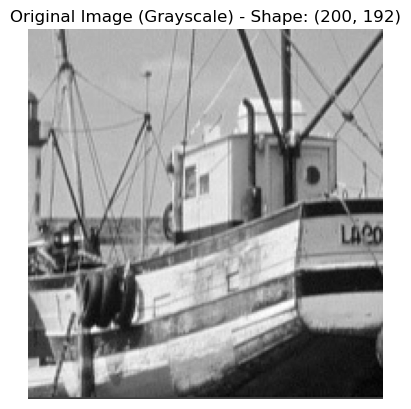

In [3]:
img_path_fishing_boat = '../assets/fishing_boat/fishing_boat.bmp'

img_fishing_boat = mpimg.imread(img_path_fishing_boat)

plt.imshow(img_fishing_boat, cmap='gray')
plt.axis('off')
plt.title('Original Image (Grayscale) - Shape: {}'.format(img_fishing_boat.shape))
plt.show()


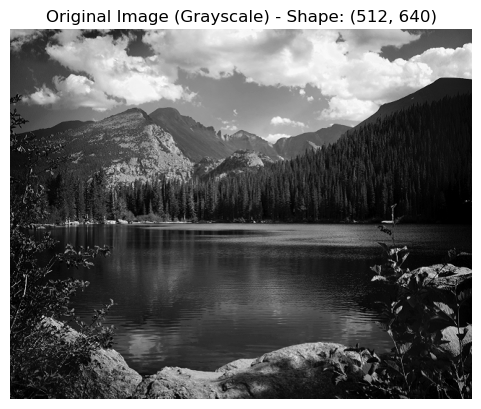

In [4]:
img_path_nature = '../assets/nature/nature.bmp'

img_nature = mpimg.imread(img_path_nature)

plt.imshow(img_nature, cmap='gray')
plt.axis('off')
plt.title('Original Image (Grayscale) - Shape: {}'.format(img_nature.shape))
plt.show()

## Synthesizing corrupted pictures
Simulates the process of data corruption by adding noise to the images.


### KxK image blocks
K = 8 for this example, we may use K = 16 for higher resolution images.

In [5]:
# use scikit-learn images for processing
%pip install scikit-image -q
from skimage.util import view_as_windows

Note: you may need to restart the kernel to use updated packages.


In [6]:
k = 8
block_shape = (k,k)
height, width = img_fishing_boat.shape

In [7]:
img_chip_selected_boat = view_as_windows(img_fishing_boat,block_shape,1)
print(img_chip_selected_boat.shape)
img_chip_selected_boat[192,0]

(193, 185, 8, 8)


array([[233, 231, 230, 229, 218, 207, 197, 178],
       [193, 177, 176, 162, 142, 133, 120, 116],
       [132, 130, 125,  99, 106,  99,  94, 105],
       [101, 115, 116,  94, 104,  90,  96, 100],
       [102, 103, 103,  98, 102,  98, 102,  96],
       [100,  95,  99,  98,  98,  99,  98,  87],
       [ 98,  94, 103,  88,  92,  91,  75,  83],
       [ 64,  64,  64,  64,  65,  65,  65,  66]], dtype=uint8)

In [8]:
x_star = 8*(8-1) # wanghley = 8 letters, 0-indexed matrices
y_star = 8*(13-1) # soares martins = 6+7 = 13 letters

Notes:
- The image is divided into KxK blocks.
- y_star refers to the # of columns and x_star refers to the # of rows.

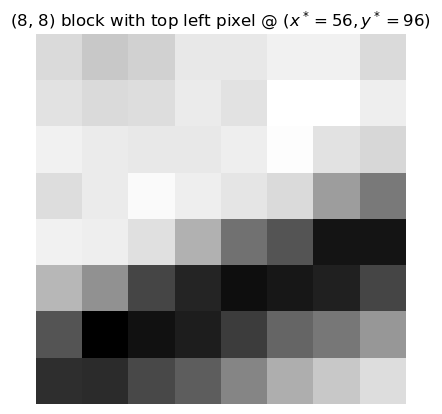

In [9]:
np.save("../assets/fishing_boat/boat-8x8-xy-star.npy", img_chip_selected_boat[x_star, y_star])
fig = plt.figure(frameon=False)
plt.imshow(img_chip_selected_boat[x_star, y_star], cmap='gray')
plt.axis('off')
plt.savefig('../assets/fishing_boat/boat-8x8-xy-star.png', bbox_inches='tight', pad_inches=0)
plt.title(f'{block_shape} block with top left pixel @ ($x^*={x_star},y^*={y_star}$) ')
plt.show()

### Selecting sensed pixels within block

In [10]:
import random as rnd

In [11]:
def generate_sensed_pixels_in_block(img_block,sensed_pixels):
    """
    Randomly selects a subset of pixels in a block and sets their values to NaN.

    Args:
        img_block (numpy.ndarray): A 2D array representing the image block.
        sensed_pixels (int): The number of pixels to set to keep.

    Returns:
        numpy.ndarray: The modified image block with sensed pixels set to NaN.
    """
    block_height, block_width = img_block.shape

    # Ensure sensed_pixels does not exceed the total number of pixels in the block
    if sensed_pixels > (block_height * block_width):
        raise ValueError("sensed_pixels cannot be greater than the total number of pixels in the block.")

    corrupted_pixels = [divmod(ele, block_height) for ele in rnd.sample(range((block_height)*(block_height)),(block_height*block_width)-sensed_pixels)]

    
    img_block = img_block.astype(float).copy()
    
    for pixel in corrupted_pixels:
        img_block[pixel[0],pixel[1]]=np.nan
        
    return img_block
    
    

### 8x8 block with S=50 sensed pixels

In [12]:
block_sensed = generate_sensed_pixels_in_block(img_chip_selected_boat[x_star,y_star],50)

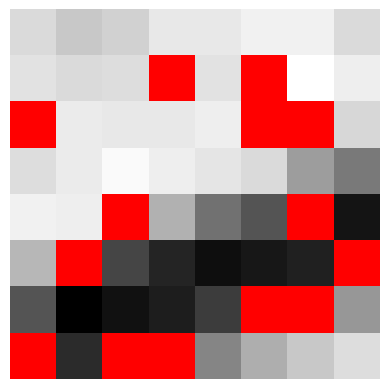

In [13]:
cmap = mpl.colormaps.get_cmap('gray')  # viridis is the default colormap for imshow
cmap.set_bad(color='red')

fig = plt.figure(frameon=False)
plt.imshow(block_sensed, cmap=cmap)
plt.axis('off')

plt.savefig('../assets/fishing_boat/boat-8x8-xy-star-50-sensed-px.png', bbox_inches='tight', pad_inches=0)
plt.show()

### 8x8 block with S=30 sensed pixels

In [14]:
block_sensed = generate_sensed_pixels_in_block(img_chip_selected_boat[x_star,y_star],30)
np.save("../assets/fishing_boat//boat-8x8-xy-star-30-sensed-px.npy", block_sensed)


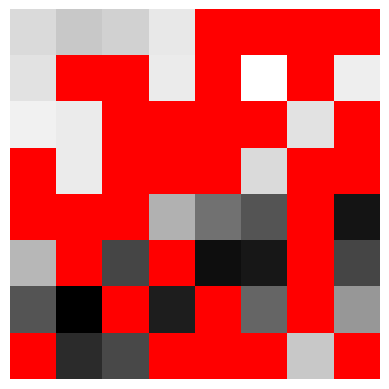

In [15]:
cmap = mpl.colormaps.get_cmap('gray')  # viridis is the default colormap for imshow
cmap.set_bad(color='red')

fig = plt.figure(frameon=False)
plt.imshow(block_sensed, cmap=cmap)
plt.axis('off')

plt.savefig('../assets/fishing_boat/boat-8x8-xy-star-30-sensed-px.png', bbox_inches='tight', pad_inches=0)
plt.show()

### 8x8 block with S=10 sensed pixels

In [16]:
block_sensed = generate_sensed_pixels_in_block(img_chip_selected_boat[x_star,y_star],10)

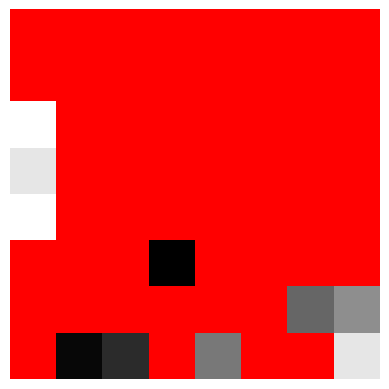

In [17]:
cmap = mpl.colormaps.get_cmap('gray')  # viridis is the default colormap for imshow
cmap.set_bad(color='red')

fig = plt.figure(frameon=False)
plt.imshow(block_sensed, cmap=cmap)
plt.axis('off')

plt.savefig('../assets/fishing_boat/boat-8x8-xy-star-10-sensed-px.png', bbox_inches='tight', pad_inches=0)
plt.show()

# Class to generate corrupted images - Blockfy class

In [18]:
def generate_sensed_pixels_in_block(img_block,sensed_pixels):
    """
    Randomly selects a subset of pixels in a block and sets their values to NaN.

    Args:
        img_block (numpy.ndarray): A 2D array representing the image block.
        sensed_pixels (int): The number of pixels to set to keep.

    Returns:
        numpy.ndarray: The modified image block with sensed pixels set to NaN.
    """
    block_height, block_width = img_block.shape

    # Ensure sensed_pixels does not exceed the total number of pixels in the block
    if sensed_pixels > (block_height * block_width):
        raise ValueError("sensed_pixels cannot be greater than the total number of pixels in the block.")

    corrupted_pixels = [divmod(ele, block_height) for ele in rnd.sample(range((block_height)*(block_height)),(block_height*block_width)-sensed_pixels)]

    
    img_block = img_block.astype(float).copy()
    
    for pixel in corrupted_pixels:
        img_block[pixel[0],pixel[1]]=np.nan
        
    return img_block

In [19]:
class BlockifyImage:
    """
    Class to generate blocks from an image and corrupt them by randomly selecting a subset of pixels to set to NaN.
    """
    def __init__(self, img, block_shape, block_step):
        self.img = mpimg.imread(img)
        self.block_shape = block_shape
        self.height, self.width =  self.img.shape
        self.block_step = block_step
        self.img_blocks = None

    def generate_blocks(self):
        self.img_blocks = view_as_windows(self.img, block_shape, self.block_shape)
        return self.img_blocks
    
    def generate_corrupted_blocks(self, sensed_pixels):
        corrupted_blocks = []
        for i in range(self.img_blocks.shape[0]):
            for j in range(self.img_blocks.shape[1]):
                corrupted_block = generate_sensed_pixels_in_block(self.img_blocks[i,j], sensed_pixels)
                corrupted_blocks.append(corrupted_block)
                
        self.corrupted_blocks = np.array(corrupted_blocks)
        return self.corrupted_blocks

    def save_corrupted_blocks(self, path):
        np.save(path, self.corrupted_blocks)
        return path
    
    def block_to_image(self, blocks):
        # Initialize the reconstructed image with NaN values
        reconstructed_image = np.full_like(self.img, np.nan, dtype=np.float32)
        
        # Calculate the number of blocks in each dimension
        num_blocks_y = (self.height - self.block_shape[0]) // self.block_step + 1
        num_blocks_x = (self.width - self.block_shape[1]) // self.block_step + 1
        
        # Reshape the blocks to match the grid structure
        blocks = blocks.reshape(num_blocks_y, num_blocks_x, self.block_shape[0], self.block_shape[1])
        
        # Place each block back into its original position
        for i in range(num_blocks_y):
            for j in range(num_blocks_x):
                y_start = i * self.block_step
                y_end = y_start + self.block_shape[0]
                x_start = j * self.block_step
                x_end = x_start + self.block_shape[1]
                
                # Assign the block to the corresponding position in the reconstructed image
                reconstructed_image[y_start:y_end, x_start:x_end] = blocks[i, j]
        
        return reconstructed_image
    
    def save_blocks(self, path, img_name, sensed_pixels):
        """
        Save the blocks and corrupted blocks to a specified path.
        """
        
        # create folder if it does not exist
        path_joined = os.path.join(path, img_name+"_blocks_"+str(sensed_pixels))
        if not os.path.exists(path_joined):
            os.makedirs(path_joined)
        
        # save blocks
        np.save(os.path.join(path_joined, img_name+"_blocks.npy"), self.img_blocks)
        # save corrupted_blcks
        np.save(os.path.join(path_joined, img_name+"_corrupted_blocks.npy"), self.corrupted_blocks)
        

In [20]:
# test class implementation
block_shape = (8,8)
block_step = 8
sensed_pixels = 50
img_path_fishing_boat = '../assets/fishing_boat/fishing_boat.bmp'

blockify = BlockifyImage(img_path_fishing_boat, block_shape, block_step)
blcks = blockify.generate_blocks()
corrupted_blcks = blockify.generate_corrupted_blocks(sensed_pixels)
blockify.save_corrupted_blocks('../assets/fishing_boat/boat-8x8-30-sensed-px-test.npy')
image_corrupted = blockify.block_to_image(corrupted_blcks)

Text(0.5, 1.0, 'Corrupted Image')

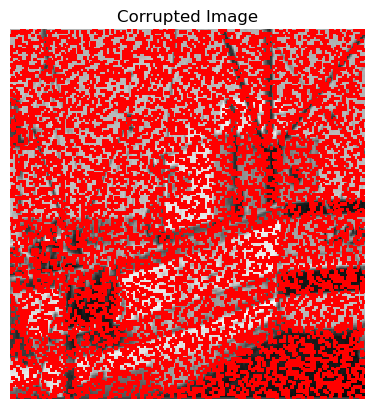

In [21]:
# Display the corrupted image set nan to red color
cmap = mpl.colormaps.get_cmap('gray')  # viridis is the default colormap for imshow
cmap.set_bad(color='red')

fig = plt.figure(frameon=False)
plt.imshow(image_corrupted, cmap=cmap)
plt.axis('off')
plt.title('Corrupted Image')

# References

GeeksforGeeks. (2023). Python N Random Tuples list. GeeksforGeeks. Retrieved from https://www.geeksforgeeks.org/python-n-random-tuples-list

